Praktek TF-IDF
=============================

***Universitas Dian Nuswantoro***

In [23]:
import pandas as pd
import numpy as np

In [24]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [25]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [26]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [27]:
dataset.shape

(902, 10)

In [28]:
dataset

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,3,3,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax,covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog kerumun orang...
...,...,...,...,...,...,...,...,...,...,...
897,897,899,Seluruh negara di dunia mengalami masa sulit k...,1.0,seluruh negara di dunia mengalami masa sulit k...,"['seluruh', 'negara', 'di', 'dunia', 'mengalam...","['seluruh', 'negara', 'di', 'dunia', 'mengalam...",seluruh negara di dunia mengalami masa sulit k...,seluruh negara di dunia mengalami masa sulit k...,seluruh negara dunia alami masa sulit covid ra...
898,898,900,"Setelah covid dan skripsi disaster selesai, ma...",1.0,setelah covid dan skripsi disaster selesai mau...,"['setelah', 'covid', 'dan', 'skripsi', 'disast...","['setelah', 'covid', 'dan', 'skripsi', 'disast...",setelah covid dan skripsi disaster selesai mau...,setelah covid dan skripsi disaster selesai mau...,covid skripsi disaster selesai mau bgt bljr ma...
899,899,901,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...",0.0,malam ini projek benda boleh bincang malam d...,"['malam', 'ini', 'projek', 'benda', 'boleh', '...","['malam', 'ini', 'projek', 'benda', 'boleh', '...",malam ini projek benda boleh bincang malam di ...,malam ini projek benda boleh bincang malam di ...,malam projek benda bincang malam fb satu belia...
900,900,902,Pontang - panting di koyak covid 19,-1.0,pontang panting di koyak covid,"['pontang', 'panting', 'di', 'koyak', 'covid']","['pontang', 'panting', 'di', 'koyak', 'covid']",pontang panting di koyak covid,pontang panting di koyak covid,pontang panting koyak covid


In [29]:
dataset_label = dataset['Sentimen']
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

# cek distribusi label

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5556\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


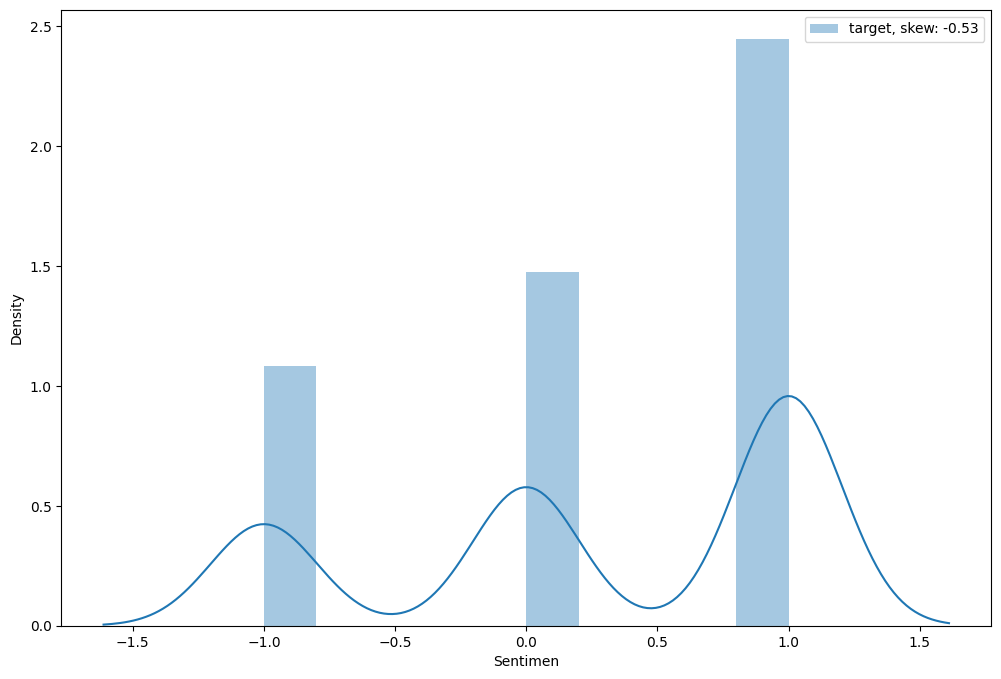

In [31]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [32]:
dataset_label.value_counts()

Sentimen
 1.0    441
 0.0    266
-1.0    195
Name: count, dtype: int64

# TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorizer = TfidfVectorizer()

In [35]:
X = vectorizer.fit_transform(dataset_feature)

In [36]:
print(X.shape)

(902, 3867)


In [37]:
features = vectorizer.get_feature_names_out()

In [38]:
features

array(['aa', 'aamiin', 'aamiingimana', ..., 'zmn', 'zona', 'zone'],
      shape=(3867,), dtype=object)

In [39]:
idfValues = vectorizer.idf_

In [40]:
d = dict(zip(features, 9 - idfValues))

In [41]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [42]:
for i in range(3867):
    print(sortedDict[i])

('covid', np.float64(7.96735782223855))
('yg', np.float64(6.077079369169385))
('virus', np.float64(5.758625638050851))
('sebar', np.float64(5.525010786869346))
('corona', np.float64(5.498342539787185))
('sama', np.float64(5.4847368877314056))
('cegah', np.float64(5.45695732362433))
('rumah', np.float64(5.45695732362433))
('orang', np.float64(5.413785151759122))
('jadi', np.float64(5.39897006597398))
('semua', np.float64(5.39897006597398))
('wabah', np.float64(5.321411831628106))
('moga', np.float64(5.271814890488734))
('indonesia', np.float64(5.201610631815486))
('pandemi', np.float64(5.164569360135136))
('perintah', np.float64(5.164569360135136))
('tangan', np.float64(5.12610307930734))
('hari', np.float64(5.10630045201116))
('ada', np.float64(5.065478457490905))
('tak', np.float64(5.000939936353334))
('warga', np.float64(5.000939936353334))
('banyak', np.float64(4.978467080501275))
('lebih', np.float64(4.978467080501275))
('pasien', np.float64(4.978467080501275))
('positif', np.float

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [44]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

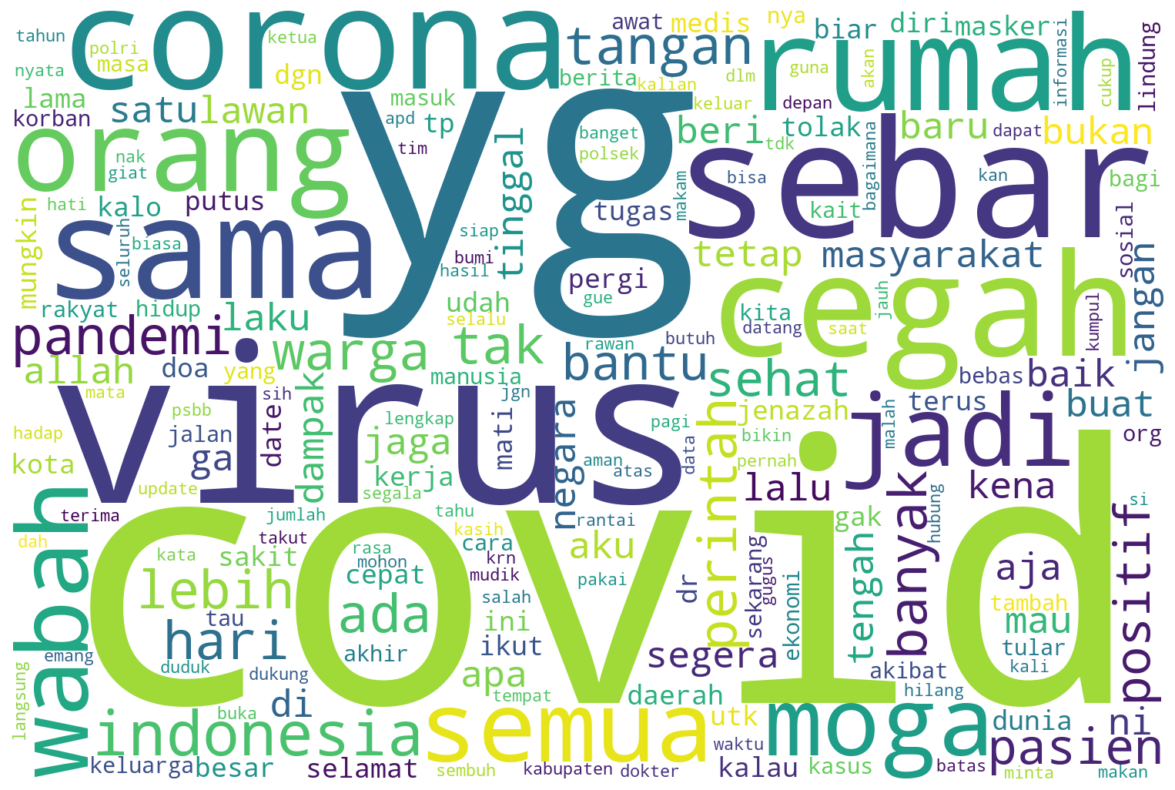

In [45]:
PlotWordCloud(d)